#
根据基本性能可视化各权重的相对重要关系。
根据各搜救产品的使用说明大致在效益和成本的三项占比因素中赋分，可视化点阵图后确定判断矩阵。
#
由判断矩阵确定权重向量，初始化w1,w2,w3
#
由比例权重向量计算CER并确定最终选择设备的优先顺序
#
可视化各个设备计算出的成效比

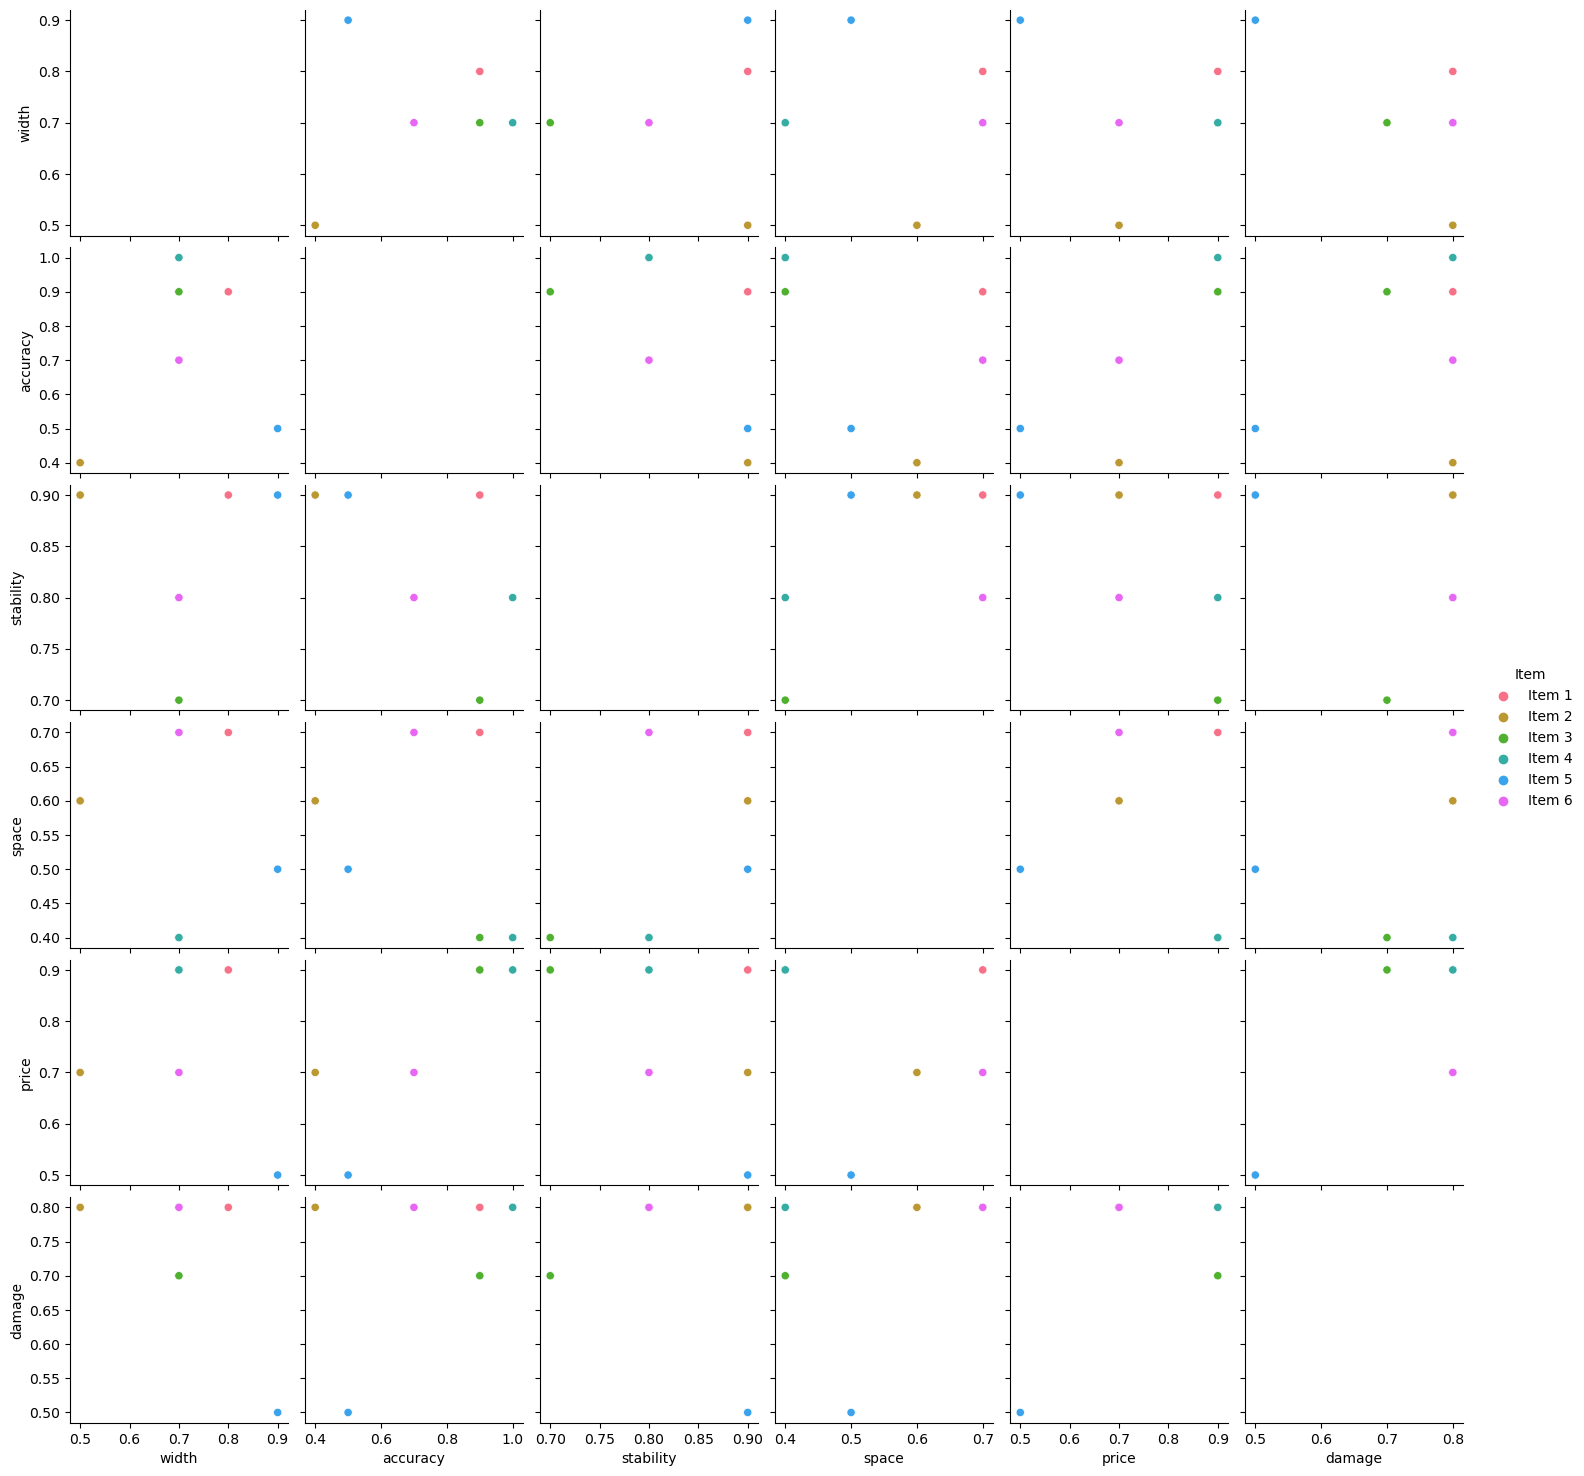

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 物品的名称
labels = ['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5','Item 6']

# 物品的三个指标的数值
data = np.array([[0.8,0.9,0.9,0.7,0.9,0.8],
                 [0.5,0.4,0.9,0.6,0.7,0.8],
                 [0.7,0.9,0.7,0.4,0.9,0.7],
                 [0.7,1.0,0.8,0.4,0.9,0.8],
                 [0.9,0.5,0.9,0.5,0.5,0.5],
                 [0.7,0.7,0.8,0.7,0.7,0.8]])

# 创建DataFrame
df = pd.DataFrame(data, columns=['width', 'accuracy', 'stability','space','price','damage'], index=labels)

# 添加标签
df['Item'] = labels

# 绘制散点图矩阵
sns.pairplot(df, kind='scatter', diag_kind='kde', markers='o', hue='Item', palette='husl')

plt.show()



In [11]:


import numpy as np

# 定义判断矩阵
A = np.array([[1, 4, 5],
              [1/4, 1, 4],
              [1/5, 1/4, 1]])

# 计算特征值和特征向量
D, V = np.linalg.eig(A)

# 提取最大特征值及其对应的特征向量
maxEigValIndex = np.argmax(np.real(D))
maxEigVal = np.real(D[maxEigValIndex])
priorityVector = np.real(V[:, maxEigValIndex]) / np.sum(np.real(V[:, maxEigValIndex]))

# 输出优先权向量
print('优先权向量:')
print(priorityVector)

# 计算一致性指标CI
n = A.shape[0]
CI = (maxEigVal - n) / (n - 1)

# 查找相应的平均随机一致性指数（RI）
# 这里给出常见的RI值，适用于不同大小的判断矩阵
RI = np.array([0, 0, 0.58, 0.9, 1.12, 1.24, 1.32, 1.41, 1.45])

# 计算一致性比率CR
CR = CI / RI[n]

# 输出一致性检验结果
print(maxEigVal)
print(CR)

if CR < 0.1:
    print('一致性可接受。')
else:
    print('一致性不可接受，请重新评估判断矩阵。')


优先权向量:
[0.66483879 0.2449287  0.09023251]
一致性比率CR:
3.1522170036048824
0.08456500200271247
一致性可接受。


In [11]:
import numpy as np
from scipy.integrate import quad

# 初始化设备数据
devices = ['声纳', '潜水器', '无人机']
costs = [50000, 150000, 30000]  # 各设备的总成本（购买、维护、操作）
ranges = [500, 300, 1000]  # 搜救范围
accuracies = [80, 90, 85]  # 精确度
reliabilities = [95, 90, 80]  # 可靠性

# 定义时间范围
t_values = np.linspace(0, 10, 100)  # 假设时间范围从0到10

# 定义权重参数
def w_range(t):
    return 0.4 * np.exp(-0.1 * t)

def w_accuracy(t):
    return 0.3 * np.exp(0.1 * t)

w_reliability = 0.3

# 计算 E 值
def calculate_E(t, device_index):
    return quad(lambda tau: (w_range(tau) * ranges[device_index] + w_accuracy(tau) * accuracies[device_index] + w_reliability * reliabilities[device_index]), 0, t)[0]

# 计算成本效益比率
CERs = []
for i, device in enumerate(devices):
    E_values = [calculate_E(t, i) for t in t_values]
    C = costs[i]
    # 计算 E 值的积分平均值
    avg_E = sum(E_values) / len(E_values)
    CERs.append(avg_E / C)

# 输出结果
for i, device in enumerate(devices):
    print('%s 的成本效益比率为：%f' % (device, CERs[i]))

bestDeviceIndex = CERs.index(max(CERs))
print('推荐选择的设备是：%s' % devices[bestDeviceIndex])


声纳 的成本效益比率为：0.020999
潜水器 的成本效益比率为：0.005134
无人机 的成本效益比率为：0.059098
推荐选择的设备是：无人机


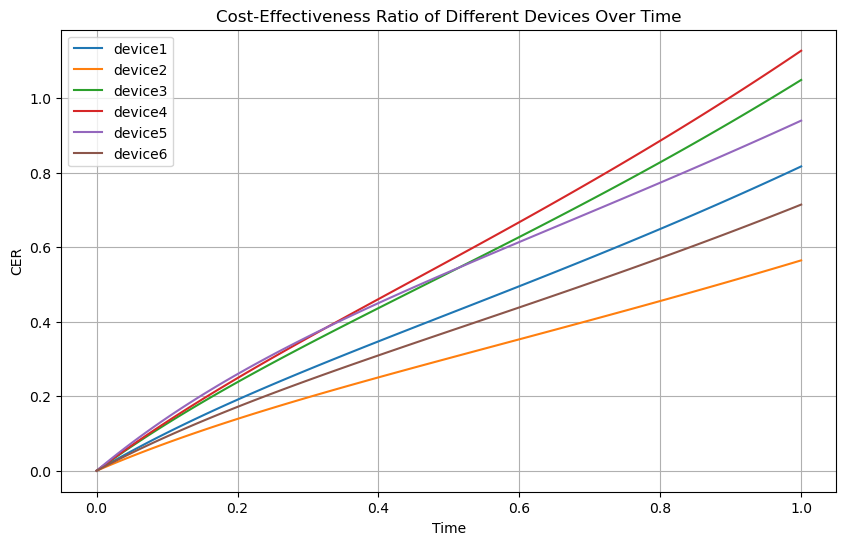

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 初始化设备数据
devices = ['device1', 'device2', 'device3','device4','device5','device6']
costs = [
    0.66*0.7+0.24*0.9+0.10*0.8,
    0.66*0.6+0.24*0.7+0.10*0.8,
    0.66*0.4+0.24*0.9+0.10*0.7,
    0.66*0.4+0.24*0.9+0.10*0.8,
    0.66*0.5+0.24*0.5+0.10*0.5,
    0.66*0.7+0.24*0.7+0.10*0.8
        ]  # 各设备的总成本（购买、维护、操作）
ranges = [0.8,0.5,0.7,0.7,0.9,0.7]  # 搜救范围
accuracies = [0.9,0.4,0.9,1.0,0.5,0.7]  # 精确度
reliabilities = [0.9,0.9,0.7,0.8,0.9,0.8]  # 可靠性

# 定义时间范围
t_values = np.linspace(0, 1, 100)  # 假设时间范围从0到10

# 定义权重参数
def w_range(t):
    return 0.60 * np.exp(-3.6 * t)

def w_accuracy(t):
    return 0.27 * np.exp(0.8* t)

w_reliability = 0.13

# 计算 E 值
def calculate_E(t, device_index):
    return quad(lambda tau: (w_range(tau) * ranges[device_index] + w_accuracy(tau) * accuracies[device_index] + w_reliability * reliabilities[device_index]), 0, t)[0]

# 计算成本效益比率
CERs = [[] for _ in devices]
for i, device in enumerate(devices):
    for t in t_values:
        E = calculate_E(t, i)
        C = costs[i]
        CER = E / C
        CERs[i].append(CER)

# 创建动态图表
plt.figure(figsize=(10, 6))
for i, device in enumerate(devices):
    plt.plot(t_values, CERs[i], label=device)

plt.xlabel('Time')
plt.ylabel('CER')
plt.title('Cost-Effectiveness Ratio of Different Devices Over Time')
plt.legend()
plt.grid(True)
plt.show()



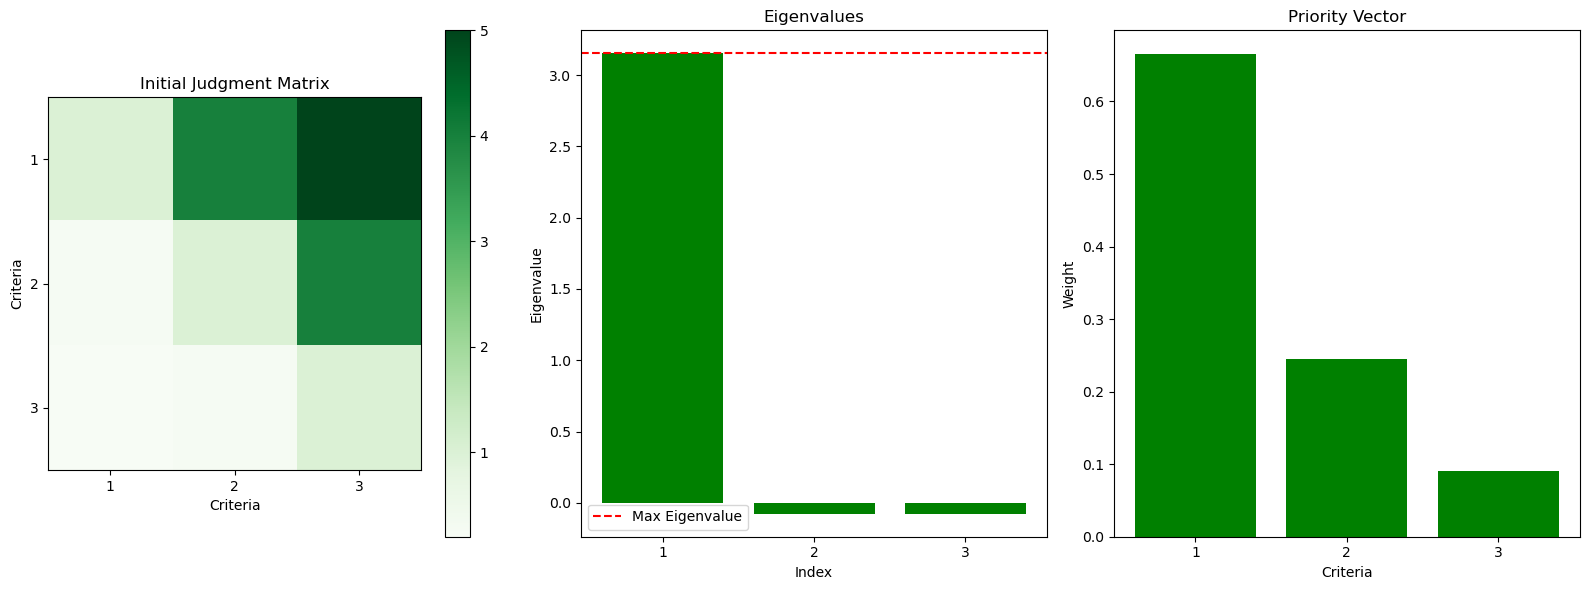

一致性比率CR: 0.08456500200271247
一致性可接受。


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 定义判断矩阵
A = np.array([[1, 4, 5],
              [1/4, 1, 4],
              [1/5, 1/4, 1]])

# 计算特征值和特征向量
D, V = np.linalg.eig(A)

# 提取最大特征值及其对应的特征向量
maxEigValIndex = np.argmax(np.real(D))
maxEigVal = np.real(D[maxEigValIndex])
priorityVector = np.real(V[:, maxEigValIndex]) / np.sum(np.real(V[:, maxEigValIndex]))

# 创建子图
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# 绘制初始判断矩阵
axs[0].imshow(A, cmap='Greens', interpolation='nearest')
axs[0].set_title('Initial Judgment Matrix')
axs[0].set_xlabel('Criteria')
axs[0].set_ylabel('Criteria')
axs[0].set_xticks(np.arange(len(A)))
axs[0].set_yticks(np.arange(len(A)))
axs[0].set_xticklabels(np.arange(1, len(A) + 1))
axs[0].set_yticklabels(np.arange(1, len(A) + 1))
plt.colorbar(axs[0].imshow(A, cmap='Greens', interpolation='nearest'), ax=axs[0])

# 绘制特征值的条形图，调整为绿色
axs[1].bar(np.arange(len(D)), np.real(D), color='green')
axs[1].set_title('Eigenvalues')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Eigenvalue')
axs[1].set_xticks(np.arange(len(D)))
axs[1].set_xticklabels(np.arange(1, len(D) + 1))
axs[1].axhline(maxEigVal, color='red', linestyle='--', label='Max Eigenvalue')
axs[1].legend()

# 绘制优先权向量，调整为绿色
axs[2].bar(np.arange(len(priorityVector)), priorityVector, color='green')
axs[2].set_title('Priority Vector')
axs[2].set_xlabel('Criteria')
axs[2].set_ylabel('Weight')
axs[2].set_xticks(np.arange(len(priorityVector)))
axs[2].set_xticklabels(np.arange(1, len(priorityVector) + 1))


# 显示图形
plt.tight_layout()
plt.show()

# 计算一致性指标CI
n = A.shape[0]
CI = (maxEigVal - n) / (n - 1)

# 查找相应的平均随机一致性指数（RI）
RI = np.array([0, 0, 0.58, 0.9, 1.12, 1.24, 1.32, 1.41, 1.45])

# 计算一致性比率CR
CR = CI / RI[n]

# 输出一致性检验结果
print('一致性比率CR:', CR)
if CR < 0.1:
    print('一致性可接受。')
else:
    print('一致性不可接受，请重新评估判断矩阵。')



